In [5]:
import onnxruntime as ort
import numpy as np

ort_encoder = ort.InferenceSession('vae_encoder.onnx')
ort_decoder = ort.InferenceSession('vae_decoder.onnx')

In [6]:
import pyarrow.dataset as ds
dataset = ds.dataset('/home/doserbd/data/gaia/xp_sampled_mean_spectrum/parquet/XpSampledMeanSpectrum_000000-003111.parquet')
table = dataset.to_table(columns=['flux'])
data = table.to_pandas()['flux'][0]
data = data.reshape(1, 1, 344)
data = np.float32(data)
norm = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
data = norm(data)
data.shape

(1, 1, 344)

In [7]:
z = ort_encoder.run(['div'], {'l_x_': data})
recon = ort_decoder.run(None, {'l_x_': z[0]})
recon[0].shape

(1, 1, 344)

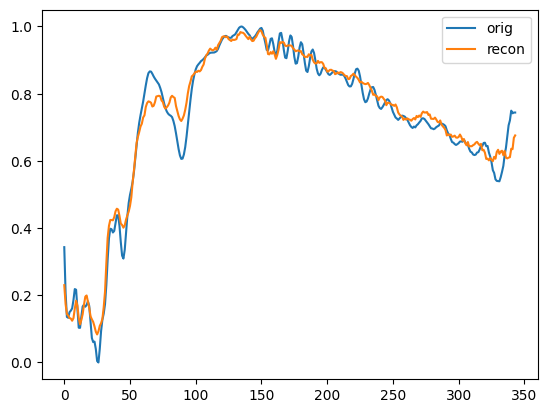

In [8]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(data[0][0], label=f"orig")
plt.plot(recon[0][0][0], label=f"recon")
plt.legend(loc="upper right")
plt.show()